In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.signal import find_peaks

from sre_parse import CATEGORIES

all = pd.DataFrame(pd.read_excel('sensordata_excel/complete_data_left_right.xlsx'))


all.dropna()
all.shape

data = all[['acc.ax','acc.ay','acc.az','acc.gx','acc.gy','acc.gz','gyro.gx','gyro.gy','gyro.gz','timestamp']]

target = all[['target']]
target_names = all[['target.names']]
print(all)


        acc.ax    acc.ay    acc.az  acc.gx  acc.gy  acc.gz   gyro.gx  \
0    -0.033672 -0.069784  1.158024   -5.04   -5.39   24.92 -0.208696   
1    -0.045384  0.149816  1.056032   -1.12    0.35   25.06 -0.069565   
2     0.022936  0.010736  0.818864    4.69   -3.36   26.39  1.043478   
3    -0.072712  0.190808  1.031632   -2.66   -5.88   27.09 -2.226087   
4    -0.027328  0.109312  1.126304    1.54   -5.74   29.19  2.295652   
...        ...       ...       ...     ...     ...     ...       ...   
1746  0.048312  0.019032  0.843752   -4.20   -4.69   -0.70  6.608696   
1747 -0.015128  0.136640  1.009184   -0.28   -5.74   -1.40  3.130435   
1748 -0.024400  0.054168  1.040416    1.96   -4.90   -1.82  1.460870   
1749 -0.048800  0.334768  0.969656    2.38   -4.97   -2.66 -6.956522   
1750  0.010248  0.030256  1.084824    2.24   -1.82   -2.80 -0.347826   

       gyro.gy    gyro.gz      timestamp  target target.names  
0    -4.730435  26.782610  1662114927655       0    left_with  
1    -2

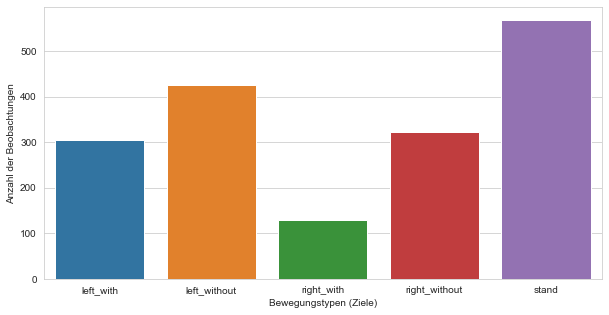

In [2]:
sns.set_style('whitegrid') 
plt.figure(figsize = (10, 5)) 
sns.countplot(x = 'target.names', data = all) 
plt.xlabel('Bewegungstypen (Ziele)')
plt.ylabel('Anzahl der Beobachtungen')
plt.show( )

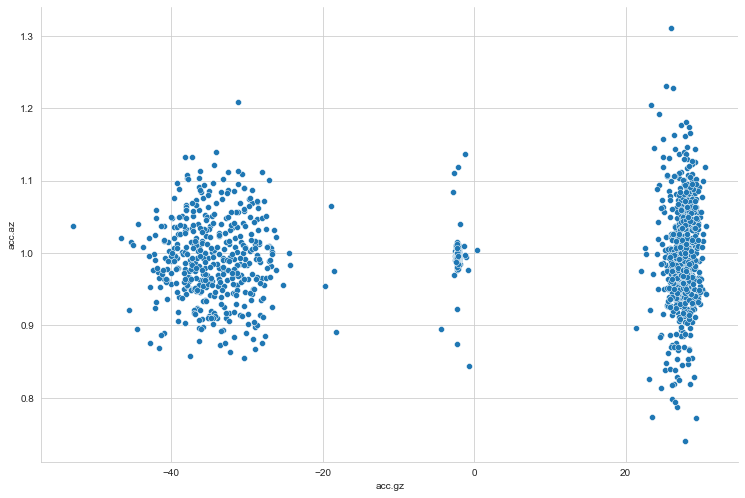

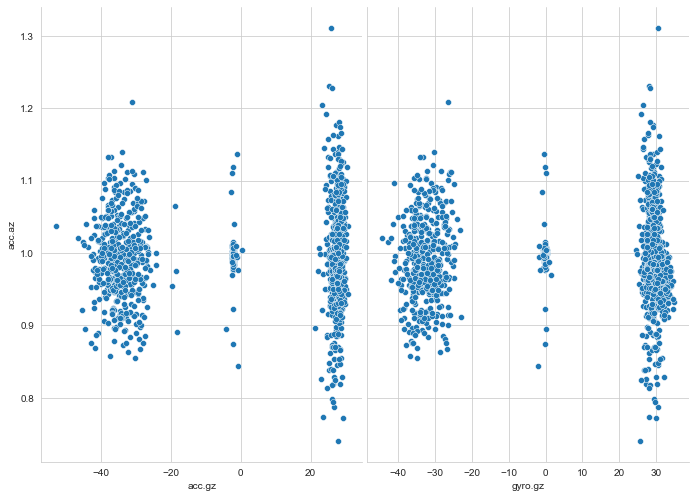

In [3]:
import seaborn as sns
sns.pairplot(all, x_vars= ['acc.gz'], y_vars='acc.az', size = 7, aspect= 1.5)

sns.pairplot(all, x_vars= ['acc.gz', 'gyro.gz'], y_vars='acc.az', size = 7, aspect= 0.7)

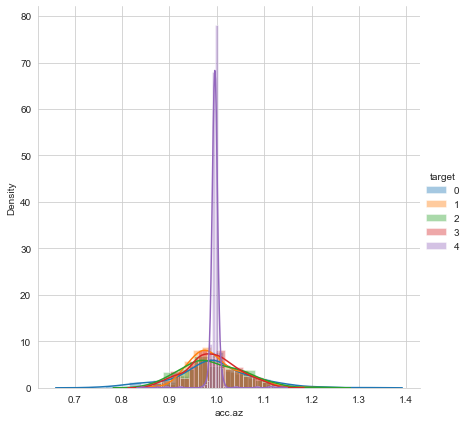

In [4]:
sns.FacetGrid(all, hue = 'target', size = 6).map(sns.distplot, 'acc.az').add_legend()

In [5]:
sns.pairplot(data)

Error in callback <function flush_figures at 0x000001A7250ABD90> (for post_execute):


KeyboardInterrupt: 

In [ ]:
accgx_list =[]
accgy_list =[]
accgz_list = []


accax_list = []
accay_list = []
accaz_list = []


gyrogx_list = []
gyrogy_list = []
gyrogz_list = []

train_labels = []
train_names = []

window_size = 18 
step_size = 6

for i in range(0, data.shape[0] - window_size, step_size):
    accax = data['acc.ax'].values[i: i + 18]
    accay = data['acc.ay'].values[i: i + 18]
    accaz = data['acc.az'].values[i: i + 18]
    accgx = data['acc.gx'].values[i: i + 18]
    accgy = data['acc.gy'].values[i: i + 18]
    accgz = data['acc.gz'].values[i: i + 18]
    gyrogx = data['gyro.gz'].values[i: i + 18]
    gyrogy = data['gyro.gz'].values[i: i + 18]
    gyrogz = data['gyro.gz'].values[i: i + 18]
    label = stats.mode(target[i: i + 18])[0][0]
    labeln = stats.mode(target_names[i: i + 18])[0][0]

    accax_list.append(accax)
    accay_list.append(accay)
    accaz_list.append(accaz)
    accgx_list.append(accgx)
    accgy_list.append(accgy)
    accgz_list.append(accgz)
    gyrogx_list.append(gyrogx)
    gyrogy_list.append(gyrogy)
    gyrogz_list.append(gyrogz)
    train_labels.append(label)
    train_names.append(labeln)

# neues DataFrame
X_data = pd.DataFrame()

# Mittelwert
X_data['accax_mean'] = pd.Series(accax_list).apply(lambda x: x.mean())
X_data['accay_mean'] = pd.Series(accay_list).apply(lambda x: x.mean())
X_data['accaz_mean'] = pd.Series(accaz_list).apply(lambda x: x.mean())
X_data['accgx_mean'] = pd.Series(accgx_list).apply(lambda x: x.mean())
X_data['accgy_mean'] = pd.Series(accgy_list).apply(lambda x: x.mean())
X_data['accgz_mean'] = pd.Series(accgz_list).apply(lambda x: x.mean())
X_data['gyrogx_mean'] = pd.Series(gyrogx_list).apply(lambda x: x.mean())
X_data['gyrogy_mean'] = pd.Series(gyrogy_list).apply(lambda x: x.mean())
X_data['gyrogz_mean'] = pd.Series(gyrogz_list).apply(lambda x: x.mean())

# Standardabweichung
X_data['accax_std'] = pd.Series(accax_list).apply(lambda x: x.std())
X_data['accay_std'] = pd.Series(accay_list).apply(lambda x: x.std())
X_data['accaz_std'] = pd.Series(accaz_list).apply(lambda x: x.std())
X_data['accgx_std'] = pd.Series(accgx_list).apply(lambda x: x.std())
X_data['accgy_std'] = pd.Series(accgy_list).apply(lambda x: x.std())
X_data['accgz_std'] = pd.Series(accgz_list).apply(lambda x: x.std())
X_data['gyrogx_std'] = pd.Series(gyrogx_list).apply(lambda x: x.std())
X_data['gyrogy_std'] = pd.Series(gyrogy_list).apply(lambda x: x.std())
X_data['gyrogz_std'] = pd.Series(gyrogz_list).apply(lambda x: x.std())

# durchschnittliche absolute Abweichung
X_data['accax_aad'] = pd.Series(accax_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accay_aad'] = pd.Series(accay_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accaz_aad'] = pd.Series(accaz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accgx_aad'] = pd.Series(accgx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accgy_aad'] = pd.Series(accgy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accgz_aad'] = pd.Series(accgz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['gyrogx_aad'] = pd.Series(gyrogx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['gyrogy_aad'] = pd.Series(gyrogy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['gyrogz_aad'] = pd.Series(gyrogz_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# Minimalwert
X_data['accax_min'] = pd.Series(accax_list).apply(lambda x: x.min())
X_data['accay_min'] = pd.Series(accay_list).apply(lambda x: x.min())
X_data['accaz_min'] = pd.Series(accaz_list).apply(lambda x: x.min())
X_data['accgx_min'] = pd.Series(accgz_list).apply(lambda x: x.min())
X_data['accgy_min'] = pd.Series(accgz_list).apply(lambda x: x.min())
X_data['accgz_min'] = pd.Series(accgz_list).apply(lambda x: x.min())
X_data['gyrogx_min'] = pd.Series(gyrogx_list).apply(lambda x: x.min())
X_data['gyrogy_min'] = pd.Series(gyrogy_list).apply(lambda x: x.min())
X_data['gyrogz_min'] = pd.Series(gyrogz_list).apply(lambda x: x.min())

# Maximalwert
X_data['accax_max'] = pd.Series(accax_list).apply(lambda x: x.max())
X_data['accay_max'] = pd.Series(accay_list).apply(lambda x: x.max())
X_data['accaz_max'] = pd.Series(accaz_list).apply(lambda x: x.max())
X_data['accgx_max'] = pd.Series(accgx_list).apply(lambda x: x.max())
X_data['accgy_max'] = pd.Series(accgy_list).apply(lambda x: x.max())
X_data['accgz_max'] = pd.Series(accgz_list).apply(lambda x: x.max())
X_data['gyrogx_max'] = pd.Series(gyrogx_list).apply(lambda x: x.max())
X_data['gyrogy_max'] = pd.Series(gyrogy_list).apply(lambda x: x.max())
X_data['gyrogz_max'] = pd.Series(gyrogz_list).apply(lambda x: x.max())


# Median
X_data['accax_median'] = pd.Series(accax_list).apply(lambda x: np.median(x))
X_data['accay_median'] = pd.Series(accay_list).apply(lambda x: np.median(x))
X_data['accaz_median'] = pd.Series(accaz_list).apply(lambda x: np.median(x))
X_data['accgx_median'] = pd.Series(accgx_list).apply(lambda x: np.median(x))
X_data['accgy_median'] = pd.Series(accgy_list).apply(lambda x: np.median(x))
X_data['accgz_median'] = pd.Series(accgz_list).apply(lambda x: np.median(x))
X_data['gyrogx_median'] = pd.Series(gyrogx_list).apply(lambda x: np.median(x))
X_data['gyrogy_median'] = pd.Series(gyrogy_list).apply(lambda x: np.median(x))
X_data['gyrogz_median'] = pd.Series(gyrogz_list).apply(lambda x: np.median(x))

# Median absolute Abweichung
X_data['accax_mad'] = pd.Series(accax_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accay_mad'] = pd.Series(accay_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accaz_mad'] = pd.Series(accaz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accgx_mad'] = pd.Series(accgx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accgy_mad'] = pd.Series(accgy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accgz_mad'] = pd.Series(accgz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['gyrogx_mad'] = pd.Series(gyrogx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['gyrogy_mad'] = pd.Series(gyrogy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['gyrogz_mad'] = pd.Series(gyrogz_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# Interquartilbereich
X_data['accax_IQR'] = pd.Series(accax_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accay_IQR'] = pd.Series(accay_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accaz_IQR'] = pd.Series(accaz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accgx_IQR'] = pd.Series(accgx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accgy_IQR'] = pd.Series(accgy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accgz_IQR'] = pd.Series(accgz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['gyrogx_IQR'] = pd.Series(gyrogx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['gyrogy_IQR'] = pd.Series(gyrogy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['gyrogz_IQR'] = pd.Series(gyrogz_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))


# Beschleunigung avg
X_data['avg_result_acc'] = [i.mean() for i in ((pd.Series(accax_list)**2 + pd.Series(accay_list)**2 + pd.Series(accaz_list)**2)**0.5)]


"""
 
# energy
X_data['accaz_energy'] = pd.Series(accax_list).apply(lambda x: np.sum(x**2)/18)
X_data['accaz_energy'] = pd.Series(accay_list).apply(lambda x: np.sum(x**2)/18)
X_data['accaz_energy'] = pd.Series(accaz_list).apply(lambda x: np.sum(x**2)/18)
X_data['accgx_energy'] = pd.Series(accgx_list).apply(lambda x: np.sum(x**2)/18)
X_data['accgy_energy'] = pd.Series(accgy_list).apply(lambda x: np.sum(x**2)/18)
X_data['accgz_energy'] = pd.Series(accgz_list).apply(lambda x: np.sum(x**2)/18)
X_data['gyrogx_energy'] = pd.Series(gyrogx_list).apply(lambda x: np.sum(x**2)/18)
X_data['gyrogy_energy'] = pd.Series(gyrogy_list).apply(lambda x: np.sum(x**2)/18)
X_data['gyrogz_energy'] = pd.Series(gyrogz_list).apply(lambda x: np.sum(x**2)/18)


# Negative Werte zählen
X_data['accax_neg_count'] = pd.Series(accax_list).apply(lambda x: np.sum(x < 0))
X_data['accay_neg_count'] = pd.Series(accay_list).apply(lambda x: np.sum(x < 0))
X_data['accaz_neg_count'] = pd.Series(accaz_list).apply(lambda x: np.sum(x < 0))
X_data['accgx_neg_count'] = pd.Series(accgx_list).apply(lambda x: np.sum(x < 0))
X_data['accgy_neg_count'] = pd.Series(accgy_list).apply(lambda x: np.sum(x < 0))
X_data['accgz_neg_count'] = pd.Series(accgz_list).apply(lambda x: np.sum(x < 0))
X_data['gyrogx_neg_count'] = pd.Series(gyrogx_list).apply(lambda x: np.sum(x < 0))
X_data['gyrogy_neg_count'] = pd.Series(gyrogy_list).apply(lambda x: np.sum(x < 0))
X_data['gyrogz_neg_count'] = pd.Series(gyrogz_list).apply(lambda x: np.sum(x < 0))

# Positive Werte zählen
X_data['accax_pos_count'] = pd.Series(accax_list).apply(lambda x: np.sum(x > 0))
X_data['accay_pos_count'] = pd.Series(accay_list).apply(lambda x: np.sum(x > 0))
X_data['accaz_pos_count'] = pd.Series(accaz_list).apply(lambda x: np.sum(x > 0))
X_data['accgx_pos_count'] = pd.Series(accgx_list).apply(lambda x: np.sum(x > 0))
X_data['accgy_pos_count'] = pd.Series(accgy_list).apply(lambda x: np.sum(x > 0))
X_data['accgz_pos_count'] = pd.Series(accgz_list).apply(lambda x: np.sum(x > 0))
X_data['gyrogx_pos_count'] = pd.Series(gyrogx_list).apply(lambda x: np.sum(x > 0))
X_data['gyrogy_pos_count'] = pd.Series(gyrogy_list).apply(lambda x: np.sum(x > 0))
X_data['gyrogz_pos_count'] = pd.Series(gyrogz_list).apply(lambda x: np.sum(x > 0))

# Anzahl der Werte über dem Mittelwert
X_data['accax_above_mean'] = pd.Series(accax_list).apply(lambda x: np.sum(x > x.mean()))
X_data['accay_above_mean'] = pd.Series(accay_list).apply(lambda x: np.sum(x > x.mean()))
X_data['accaz_above_mean'] = pd.Series(accaz_list).apply(lambda x: np.sum(x > x.mean()))
X_data['accgx_above_mean'] = pd.Series(accgx_list).apply(lambda x: np.sum(x > x.mean()))
X_data['accgy_above_mean'] = pd.Series(accgy_list).apply(lambda x: np.sum(x > x.mean()))
X_data['accgz_above_mean'] = pd.Series(accgz_list).apply(lambda x: np.sum(x > x.mean()))
X_data['gyrogx_above_mean'] = pd.Series(gyrogx_list).apply(lambda x: np.sum(x > x.mean()))
X_data['gyrogy_above_mean'] = pd.Series(gyrogy_list).apply(lambda x: np.sum(x > x.mean()))
X_data['gyrogz_above_mean'] = pd.Series(gyrogz_list).apply(lambda x: np.sum(x > x.mean()))

# Anzahl der Spitzen
X_data['accax_peak_count'] = pd.Series(accax_list).apply(lambda x: len(find_peaks(x)[0]))
X_data['accay_peak_count'] = pd.Series(accay_list).apply(lambda x: len(find_peaks(x)[0]))
X_data['accaz_peak_count'] = pd.Series(accaz_list).apply(lambda x: len(find_peaks(x)[0]))
X_data['accgx_peak_count'] = pd.Series(accgx_list).apply(lambda x: len(find_peaks(x)[0]))
X_data['accgy_peak_count'] = pd.Series(accgy_list).apply(lambda x: len(find_peaks(x)[0]))
X_data['accgz_peak_count'] = pd.Series(accgz_list).apply(lambda x: len(find_peaks(x)[0]))
X_data['gyrogx_peak_count'] = pd.Series(gyrogx_list).apply(lambda x: len(find_peaks(x)[0]))
X_data['gyrogy_peak_count'] = pd.Series(gyrogy_list).apply(lambda x: len(find_peaks(x)[0]))
X_data['gyrogz_peak_count'] = pd.Series(gyrogz_list).apply(lambda x: len(find_peaks(x)[0]))


# signal magnitude area
X_data['sma_acc_a'] =  pd.Series(accax_list).apply(lambda x: np.sum(abs(x)/18)) + pd.Series(accax_list).apply(lambda x: np.sum(abs(x)/18)) \
                + pd.Series(accax_list).apply(lambda x: np.sum(abs(x)/18))
                
X_data['sma_acc_g'] =  pd.Series(accgx_list).apply(lambda x: np.sum(abs(x)/18)) + pd.Series(accgy_list).apply(lambda x: np.sum(abs(x)/18)) \
                + pd.Series(accgz_list).apply(lambda x: np.sum(abs(x)/18))        
                
X_data['sma_gyro'] =  pd.Series(gyrogx_list).apply(lambda x: np.sum(abs(x)/18)) + pd.Series(gyrogy_list).apply(lambda x: np.sum(abs(x)/18)) \
                + pd.Series(gyrogz_list).apply(lambda x: np.sum(abs(x)/18))                           
                  """

"\n \n# energy\nX_data['accaz_energy'] = pd.Series(accax_list).apply(lambda x: np.sum(x**2)/18)\nX_data['accaz_energy'] = pd.Series(accay_list).apply(lambda x: np.sum(x**2)/18)\nX_data['accaz_energy'] = pd.Series(accaz_list).apply(lambda x: np.sum(x**2)/18)\nX_data['accgx_energy'] = pd.Series(accgx_list).apply(lambda x: np.sum(x**2)/18)\nX_data['accgy_energy'] = pd.Series(accgy_list).apply(lambda x: np.sum(x**2)/18)\nX_data['accgz_energy'] = pd.Series(accgz_list).apply(lambda x: np.sum(x**2)/18)\nX_data['gyrogx_energy'] = pd.Series(gyrogx_list).apply(lambda x: np.sum(x**2)/18)\nX_data['gyrogy_energy'] = pd.Series(gyrogy_list).apply(lambda x: np.sum(x**2)/18)\nX_data['gyrogz_energy'] = pd.Series(gyrogz_list).apply(lambda x: np.sum(x**2)/18)\n\n\n# Negative Werte zählen\nX_data['accax_neg_count'] = pd.Series(accax_list).apply(lambda x: np.sum(x < 0))\nX_data['accay_neg_count'] = pd.Series(accay_list).apply(lambda x: np.sum(x < 0))\nX_data['accaz_neg_count'] = pd.Series(accaz_list).apply(

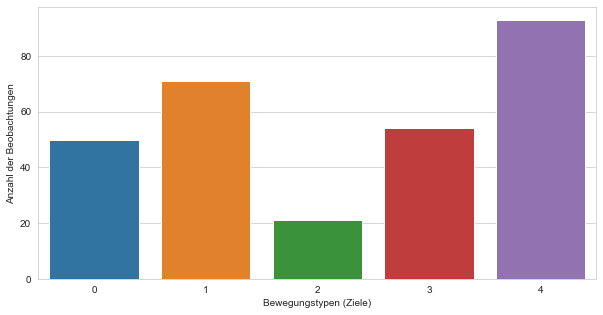

In [ ]:
X_data['target.names'] = pd.DataFrame(train_labels)

sns.set_style('whitegrid') 
plt.figure(figsize = (10, 5)) 
sns.countplot(x = 'target.names', data = X_data) 
plt.xlabel('Bewegungstypen (Ziele)')
plt.ylabel('Anzahl der Beobachtungen')
plt.show( )

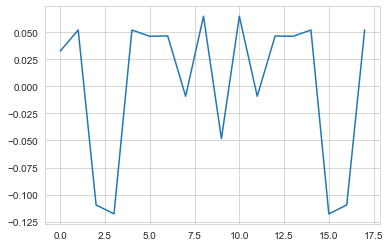

In [ ]:
pd.Series(np.fft.fft(pd.Series(accax_list)[50])).plot()
plt.show()

In [ ]:
print(X_data)

     accax_mean  accay_mean  accaz_mean  accgx_mean  accgy_mean  accgz_mean  \
0     -0.013528    0.056798    1.009103    0.591111   -2.986667   26.331667   
1     -0.008432    0.071356    0.991209    0.707778   -2.481111   26.541667   
2     -0.001844    0.076345    0.989583    0.474444   -2.772778   26.487222   
3     -0.009164    0.085698    0.969710   -0.147778   -2.745556   26.514444   
4     -0.010844    0.086566    0.970144   -0.280000   -3.072222   26.584444   
..          ...         ...         ...         ...         ...         ...   
284    0.019845    0.093967    0.998150    0.540556   -4.452778   -2.232222   
285    0.021553    0.094970    0.998014    0.552222   -4.480000   -2.236111   
286    0.023370    0.094265    0.996008    0.517222   -4.468333   -2.275000   
287    0.010248    0.104405    0.989800    0.735000   -3.962778   -2.236111   
288    0.007130    0.093913    0.998665   -0.070000   -4.363333   -1.991111   

     gyrogx_mean  gyrogy_mean  gyrogz_mean  accax_s

In [ ]:

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

X = X_data
y = train_labels

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=150, random_state=7)

logreg.fit(X_train,y_train)

importance = logreg.coef_


y_pred = logreg.predict(X_test)

log = pd.Series([metrics.precision_score(y_test, y_pred, average= 'weighted'), metrics.recall_score(y_test, y_pred, average= 'weighted'), metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average= 'weighted')])

print(metrics.classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        25
           2       0.67      1.00      0.80         2
           3       1.00      0.95      0.97        19
           4       1.00      1.00      1.00        24

    accuracy                           0.99        87
   macro avg       0.93      0.99      0.95        87
weighted avg       0.99      0.99      0.99        87



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.95238095 1.         0.9        0.95       1.         1.
 0.85       1.         0.95       1.        ]


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.85, 0.9602380952380951, 1.0)

In [ ]:

from sklearn.svm import SVC


svc = SVC(kernel="linear", C=1, random_state=42)

svc.fit(X_train,y_train)


y_pred = svc.predict(X_test)

svc = pd.Series([metrics.precision_score(y_test, y_pred, average= 'weighted'), metrics.recall_score(y_test, y_pred, average= 'weighted'), metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average= 'weighted')])

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        25
           2       0.67      1.00      0.80         2
           3       1.00      0.95      0.97        19
           4       1.00      1.00      1.00        24

    accuracy                           0.99        87
   macro avg       0.93      0.99      0.95        87
weighted avg       0.99      0.99      0.99        87



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, random_state=42)

dtc.fit(X_train,y_train)


y_pred = dtc.predict(X_test)

dtc = pd.Series([metrics.precision_score(y_test, y_pred, average= 'weighted'), metrics.recall_score(y_test, y_pred, average= 'weighted'), metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average= 'weighted')])

print(metrics.classification_report(y_test,y_pred))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        24

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test,y_pred)

1.0

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

1.0

In [ ]:
from sklearn.metrics import roc_auc_score

# Generate class membership probabilities
y_preb_probs = logreg.predict_proba(X_test)

roc_auc_score( y_test, y_preb_probs, average="weighted", multi_class="ovr")


0.995469912102772

In [ ]:

# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred = knn.predict(X_test)


knn = pd.Series([metrics.precision_score(y_test, y_pred, average= 'weighted'), metrics.recall_score(y_test, y_pred, average= 'weighted'), metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average= 'weighted')])

print(metrics.classification_report(y_test,y_pred))
 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.96      1.00      0.98        25
           2       0.50      0.50      0.50         2
           3       0.95      0.95      0.95        19
           4       1.00      1.00      1.00        24

    accuracy                           0.97        87
   macro avg       0.88      0.88      0.88        87
weighted avg       0.97      0.97      0.97        87



In [ ]:
from sklearn.ensemble import RandomForestClassifier

reg_rf = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)


rfc = pd.Series([metrics.precision_score(y_test, y_pred, average= 'weighted'), metrics.recall_score(y_test, y_pred, average= 'weighted'), metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred, average= 'weighted')])

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.96      0.96      0.96        25
           2       0.67      1.00      0.80         2
           3       1.00      0.95      0.97        19
           4       1.00      1.00      1.00        24

    accuracy                           0.97        87
   macro avg       0.91      0.97      0.93        87
weighted avg       0.97      0.97      0.97        87



In [ ]:
graph = pd.concat([rfc,dtc,svc,log,knn], axis = 1)
graph.columns = ['RandomForest', 'DecisionTreeClassifier', 'SVC', 'LogisticRegression', 'KNeighborsClassifier'] # ,'GradientBoostingClassifier'
graph.rename(index={0:'Precision',1:'Recall', 2:'Accuracy', 3: 'F1'}, inplace=True)


print(graph)

           RandomForest  DecisionTreeClassifier       SVC  LogisticRegression  \
Precision      0.969349                     1.0  0.992337            0.992337   
Recall         0.965517                     1.0  0.988506            0.988506   
Accuracy       0.965517                     1.0  0.988506            0.988506   
F1             0.966511                     1.0  0.989500            0.989500   

           KNeighborsClassifier  
Precision              0.965959  
Recall                 0.965517  
Accuracy               0.965517  
F1                     0.965456  


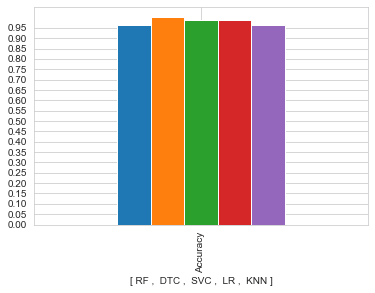

In [ ]:
from matplotlib.pyplot import bar_label, xlabel, xticks
index = [' RF ', ' DTC ', ' SVC ',
         ' LR ', ' KNN ']

graph[2:3].plot.barh(yticks = (np.arange(0, 1, step=0.05)), legend= None, width=0.5, xlabel= index);


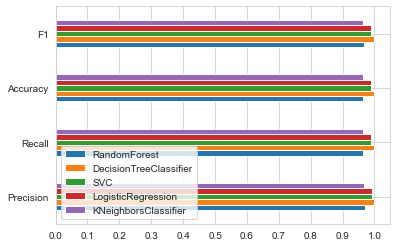

In [ ]:
ax = graph.plot.barh(xticks = (np.arange(0, 1.1, step=0.1)), width=0.5)
ax.legend(loc='lower left')

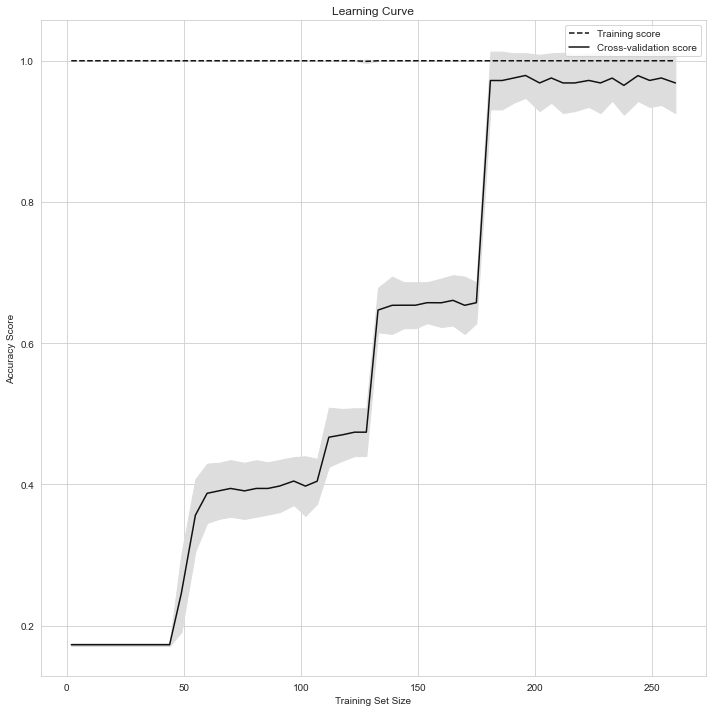

In [ ]:
 
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

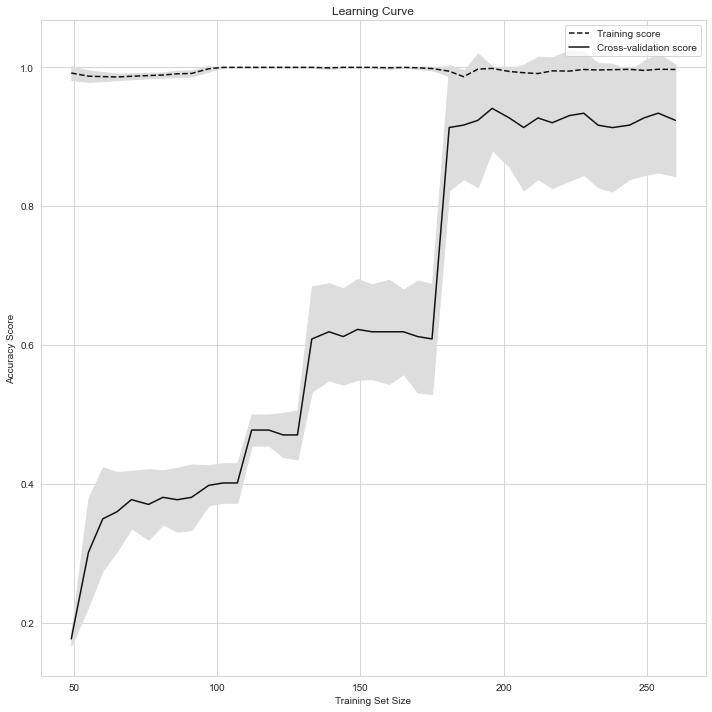

In [ ]:
 
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import plotly.express as px

fig = px.scatter_matrix(data_frame= data.drop('timestamp',axis=1), width=1200, height = 1600)
fig.show()


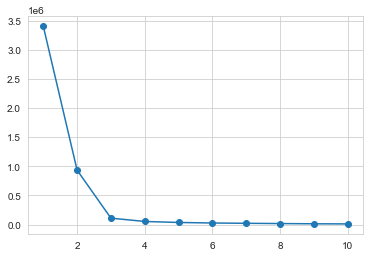

In [ ]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_data.drop('target.names',axis=1))
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')

plt.show()

In [ ]:
X = data.drop('timestamp', axis = 1)

kmeans = KMeans(
        n_clusters=5, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=X.columns)
clusters['label']=target_names
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=400,width=700)
fig4.show()

In [ ]:
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red','green','yellow','black'])

In [ ]:
#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=5)
#Run the clustering algorithm
model = k_means.fit(X_data.drop('target.names',axis=1))

#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X_data.drop('target.names',axis=1))

k_means.cluster_centers_


array([[-8.16155860e-03,  9.35311050e-02,  9.91655738e-01,
         1.29073820e+00, -6.83331050e+00, -3.44109132e+01,
        -3.26447223e+01, -3.26447223e+01, -3.26447223e+01,
         6.67491176e-02,  1.22249798e-01,  5.08685479e-02,
         2.45979680e+00,  1.30075658e+00,  4.34796845e+00,
         3.56168103e+00,  3.56168103e+00,  3.56168103e+00,
         5.21496046e-02,  1.02201544e-01,  4.14210323e-02,
         1.83240656e+00,  1.07413834e+00,  3.65198630e+00,
         2.96887483e+00,  2.96887483e+00,  2.96887483e+00,
        -1.45918685e-01, -1.27408110e-01,  9.00781151e-01,
        -4.20201370e+01, -4.20201370e+01, -4.20201370e+01,
        -3.89727222e+01, -3.89727222e+01, -3.89727222e+01,
         1.20582795e-01,  3.18470137e-01,  1.09183649e+00,
         5.65465753e+00, -4.45986301e+00, -2.64475342e+01,
        -2.62851699e+01, -2.62851699e+01, -2.62851699e+01,
        -4.77638356e-03,  8.62322740e-02,  9.89373205e-01,
         1.35493151e+00, -6.87054795e+00, -3.47545205e+0

In [ ]:
k_means.inertia_

35648.37447981087

In [ ]:
labels = k_means.labels_
metrics.silhouette_score(X_data.drop('target.names',axis=1), labels, metric = 'euclidean')

0.9146713306414762

In [ ]:
from operator import length_hint

y= X_data['target.names']
labels = k_means.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print((correct_labels), length_hint(y))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(length_hint(y))))

70 289
Accuracy score: 0.24


In [ ]:
metrics.calinski_harabasz_score(X_data, labels)

6696.39752495278

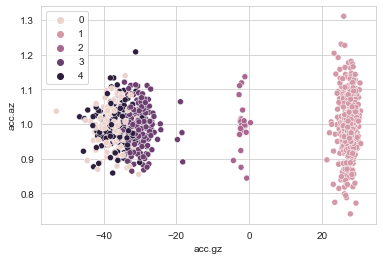

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=X, x= X['acc.gz'], y=X['acc.az'], hue=kmeans.labels_)
plt.show()